[**Demo %s**](#demo-subspace-unstable)

First we define a triangular matrix with known eigenvalues, and a random vector $b$.

In [2]:
lambda = 10 + (1:100);
A = diag(lambda) + triu(rand(100), 1); 
b = rand(100, 1);

Next we build up the first ten Krylov matrices iteratively, using renormalization after each matrix-vector multiplication.

In [3]:
Km = b;
for m = 1:29      
    v = A * Km(:, m);
    Km(:, m+1) = v / norm(v);
end

Now we solve least-squares problems for Krylov matrices of increasing dimension, recording the residual in each case.

In [4]:
warning off  
resid = zeros(30, 1);
for m = 1:30  
    z = (A * Km(:, 1:m)) \ b;
    x = Km(:, 1:m) * z;
    resid(m) = norm(b - A * x);
end

The linear system approximations show smooth linear convergence at first, but the convergence stagnates after only a few digits have been found.

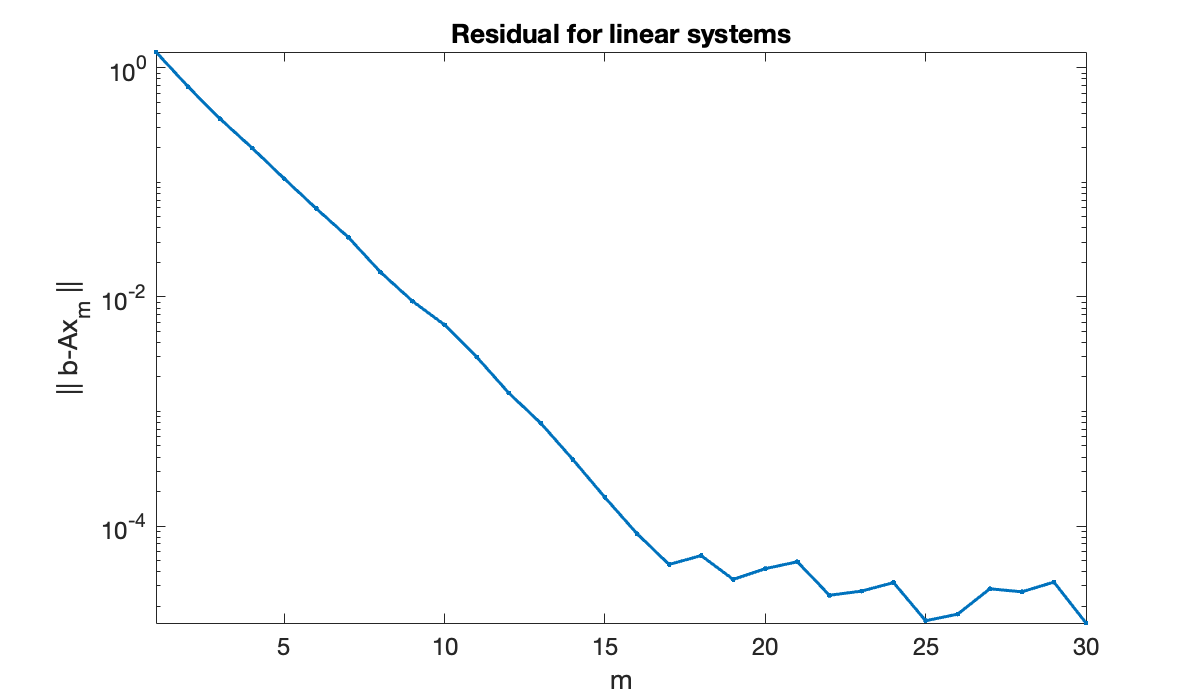

In [5]:
clf
semilogy(resid, '.-')
xlabel('m'),  ylabel('|| b-Ax_m ||')
set(gca,'ytick',10.^(-6:2:0))
axis tight, title('Residual for linear systems') 